In [14]:
import pandas as pd 
# Loading data
orders = pd.read_csv('/Users/aditireddydoma/Desktop/orders.csv')
order_prior = pd.read_csv('/Users/aditireddydoma/Desktop/order_products__prior copy.csv')
products = pd.read_csv('/Users/aditireddydoma/Desktop/products.csv')
departments = pd.read_csv('/Users/aditireddydoma/Desktop/departments.csv')
aisles = pd.read_csv('/Users/aditireddydoma/Desktop/aisles.csv')

In [15]:
# Checking for missing values 

# In Aisles table
missing_aisles = aisles['aisle'].isna().sum()
print(f"Number of missing values in aisle table: {missing_aisles}")

# In Departments table
missing_departments = departments['department'].isna().sum()
print(f"Number of missing values in department table: {missing_departments}")

# In Products table
missing_products = products[['product_name', 'aisle_id', 'department_id']].isna().sum()
print("Number of missing values in Products table: {missing_products}")



Number of missing values in aisle table: 0
Number of missing values in department table: 0
Number of missing values in Products table: {missing_products}


Top 5 First Added Products:
product_name
Banana                    110916
Bag of Organic Bananas     78988
Organic Whole Milk         30927
Organic Strawberries       27975
Organic Hass Avocado       24116
Name: count, dtype: int64


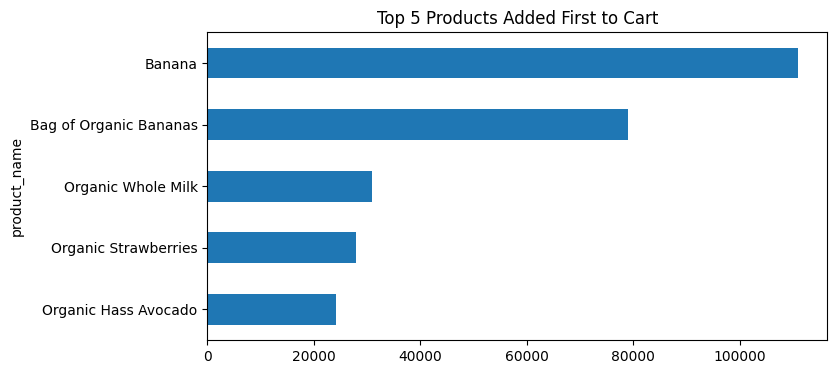

In [16]:
# Top 5 orders that are ordered first
first_added = order_prior[order_prior['add_to_cart_order'] == 1]
first_added_named = first_added.merge(products[['product_id', 'product_name']], on='product_id')
top_first_added = first_added_named['product_name'].value_counts().head(5)
print("Top 5 First Added Products:")
print(top_first_added)
# Bar Plot of top 5 orders that are ordered first
import matplotlib.pyplot as plt
top_first_added.plot(kind='barh', title='Top 5 Products Added First to Cart', figsize=(8,4))
plt.gca().invert_yaxis()
plt.show()


In [14]:
#Top 10 product pairs that are most frequently purchased together
from itertools import combinations
from collections import Counter

# Merge product_name into order_prior
order_prior = order_prior.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Group by order_id → list of product names
grouped_orders = order_prior.groupby('order_id')['product_name'].apply(list)

# Count product pairs
pair_counter = Counter()

for products_in_order in grouped_orders:
    filtered_items = [item for item in products_in_order if isinstance(item, str)]  # remove NaN
    unique_items = sorted(set(filtered_items))  # remove duplicates
    pairs = combinations(unique_items, 2)
    pair_counter.update(pairs)

# DataFrame
pair_df = pd.DataFrame(pair_counter.items(), columns=['pair', 'purchase_count'])

# Top 10 pairs
top_10_pairs = pair_df.sort_values(by='purchase_count', ascending=False).head(10)
print("Top 10 Product Pairs Frequently Purchased Together:\n")
for index, row in top_10_pairs.iterrows():
    print(f"{row['pair'][0]} + {row['pair'][1]} → {row['purchase_count']} times")

Top 10 Product Pairs Frequently Purchased Together:

Bag of Organic Bananas + Organic Hass Avocado → 62341 times
Bag of Organic Bananas + Organic Strawberries → 61628 times
Banana + Organic Strawberries → 56156 times
Banana + Organic Avocado → 53395 times
Banana + Organic Baby Spinach → 51395 times
Bag of Organic Bananas + Organic Baby Spinach → 50372 times
Banana + Strawberries → 41232 times
Banana + Large Lemon → 40880 times
Organic Hass Avocado + Organic Strawberries → 40794 times
Bag of Organic Bananas + Organic Raspberries → 40503 times


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/1741095696.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reordered, x='reorder_count', y='product_name', palette='magma')


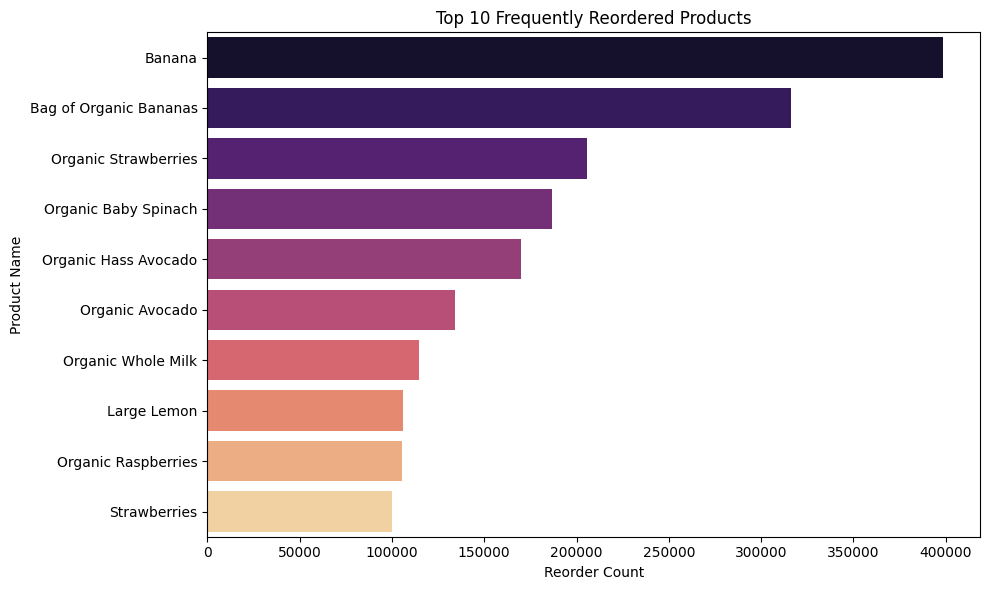

In [17]:
import seaborn as sns

#  Drop existing product_name if already merged
if 'product_name' in order_prior.columns:
    order_prior = order_prior.drop(columns=['product_name'])

# Merge product names
order_prior = order_prior.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Top reordered products 
top_reordered = (
    order_prior[order_prior['reordered'] == 1]['product_id']
    .value_counts()
    .head(10)
    .reset_index()
)
top_reordered.columns = ['product_id', 'reorder_count']

top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# BarPlot 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reordered, x='reorder_count', y='product_name', palette='magma')
plt.title('Top 10 Frequently Reordered Products')
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()



/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_30147/1966968280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_dow.index, y=order_dow.values, palette='crest')


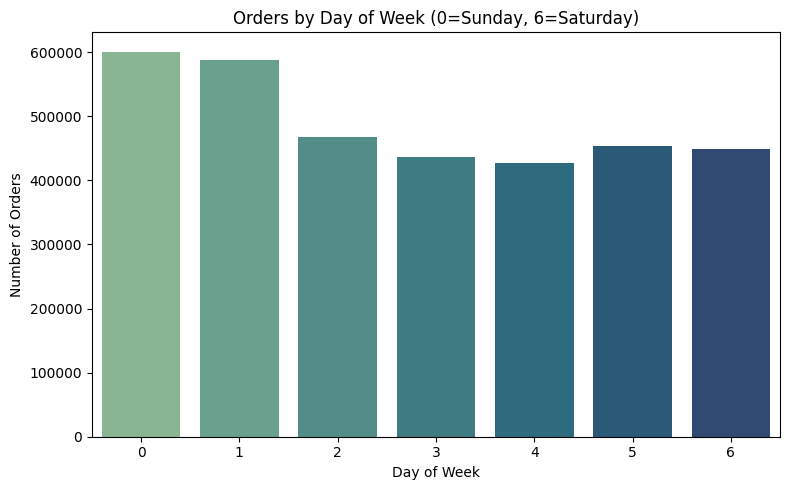

In [20]:
# Orders by day of week
order_dow = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=order_dow.index, y=order_dow.values, palette='crest')
plt.title('Orders by Day of Week (0=Sunday, 6=Saturday)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

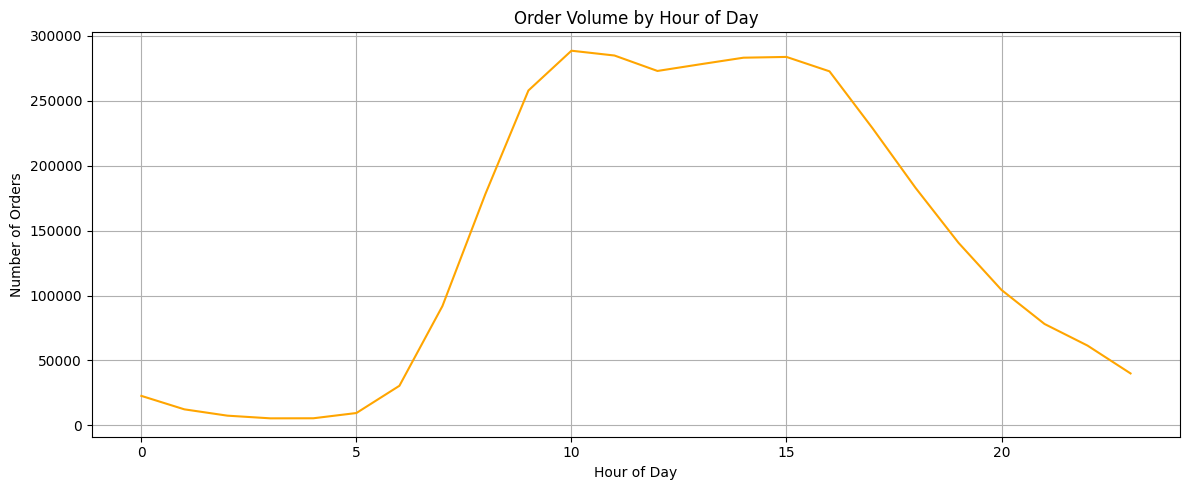

In [18]:
# Orders by hour of day
order_hour = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=order_hour.index, y=order_hour.values, color='orange')
plt.title('Order Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

Average reorder gap across users: 13.43


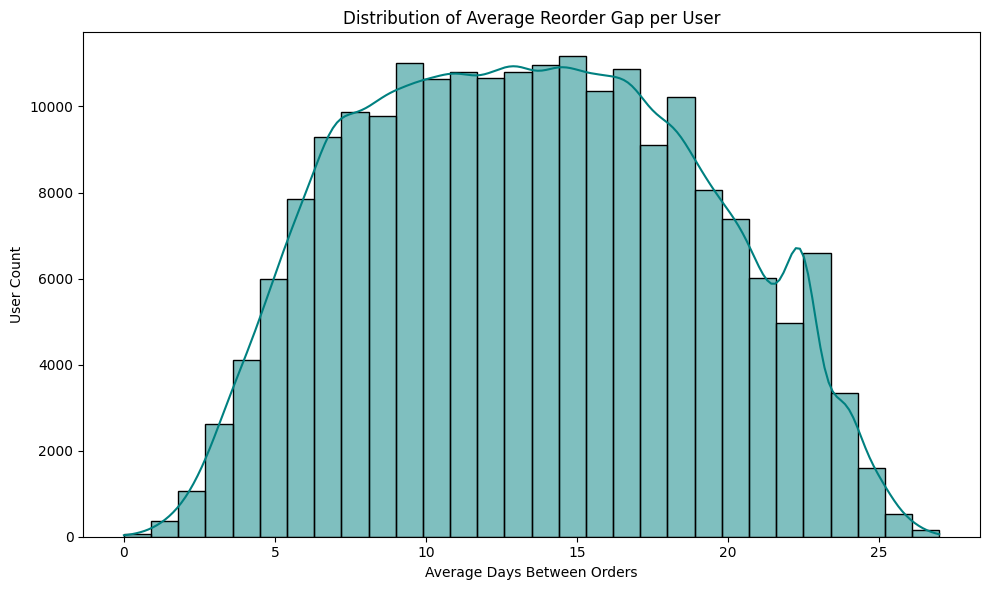

In [19]:
# Average day gap between orders
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
avg_reorder_gap = orders.groupby('user_id')['days_since_prior_order'].mean()

print("Average reorder gap across users:", round(avg_reorder_gap.mean(), 2))

# Plot distribution of reorder gaps
plt.figure(figsize=(10,6))
sns.histplot(avg_reorder_gap, bins=30, kde=True, color='teal')
plt.title('Distribution of Average Reorder Gap per User')
plt.xlabel('Average Days Between Orders')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

In [28]:
#Top 3 product names by day & time slot
# Merge product and order info
if 'product_name' in order_prior.columns:
    order_prior = order_prior.drop(columns=['product_name'])

order_prior_time = order_prior.merge(
    orders[['order_id', 'order_dow', 'order_hour_of_day']], on='order_id', how='left'
).merge(
    products[['product_id', 'product_name']], on='product_id', how='left'
)

# Column for time slot
def time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Night'

order_prior_time['time_slot'] = order_prior_time['order_hour_of_day'].apply(time_slot)

# oCunts per product for each day and time slot
top_products_by_time = (
    order_prior_time.groupby(['order_dow', 'time_slot', 'product_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['order_dow', 'time_slot', 'count'], ascending=[True, True, False])
)

# Top 3 
top3_per_slot = top_products_by_time.groupby(['order_dow', 'time_slot']).head(3)

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i in range(7):  
    print(f"\n{days[i]}")
    day_data = top3_per_slot[top3_per_slot['order_dow'] == i]
    for slot in ['Morning', 'Afternoon', 'Evening', 'Night']:
        slot_data = day_data[day_data['time_slot'] == slot]
        if not slot_data.empty:
            print(f"\n{slot}")
            for idx, row in slot_data.iterrows():
                print(f"    {row['product_name']} (ordered {row['count']} times)")



Sunday

Morning
    Banana (ordered 30824 times)
    Bag of Organic Bananas (ordered 22185 times)
    Organic Baby Spinach (ordered 17849 times)

Afternoon
    Banana (ordered 48389 times)
    Bag of Organic Bananas (ordered 35321 times)
    Organic Baby Spinach (ordered 27339 times)

Evening
    Banana (ordered 16140 times)
    Bag of Organic Bananas (ordered 12838 times)
    Organic Strawberries (ordered 9800 times)

Night
    Banana (ordered 1416 times)
    Bag of Organic Bananas (ordered 1149 times)
    Organic Baby Spinach (ordered 870 times)

Monday

Morning
    Banana (ordered 35353 times)
    Bag of Organic Bananas (ordered 27497 times)
    Organic Strawberries (ordered 17289 times)

Afternoon
    Banana (ordered 37890 times)
    Bag of Organic Bananas (ordered 30564 times)
    Organic Strawberries (ordered 20896 times)

Evening
    Banana (ordered 13227 times)
    Bag of Organic Bananas (ordered 10423 times)
    Organic Strawberries (ordered 7384 times)

Night
    Banana (ord

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/2819766863.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='product_name', ax=ax, palette='coolwarm')
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/2819766863.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='product_name', ax=ax, palette='coolwarm')
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/2819766863.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='count', y='prod

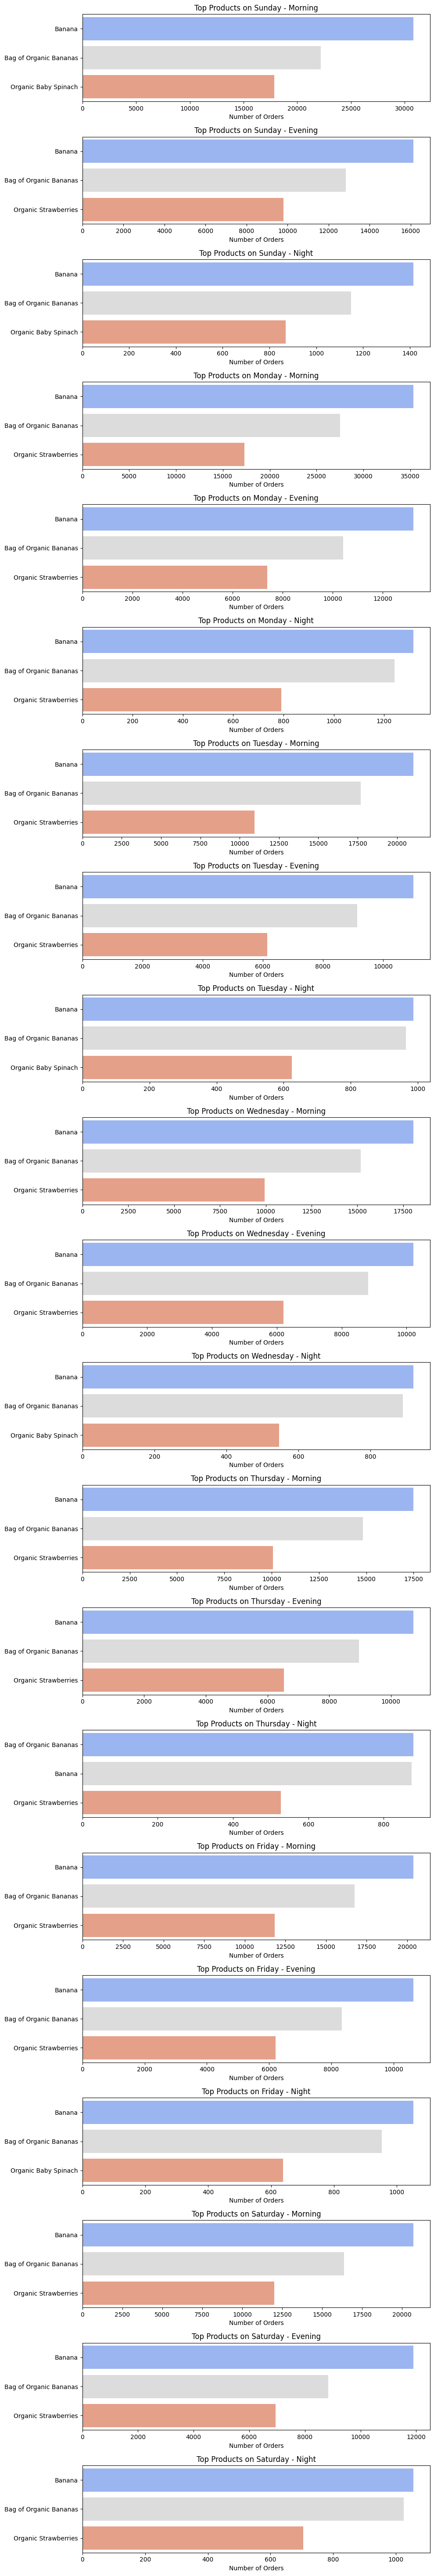

In [33]:
# Plot for Top 3 product names by day & time slot
import seaborn as sns
import matplotlib.pyplot as plt

# Map order_dow to day name
top3_per_slot['day_name'] = top3_per_slot['order_dow'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Order of time slots
ordered_slots = ['Morning', 'Evening', 'Night']
top3_per_slot = top3_per_slot[top3_per_slot['time_slot'].isin(ordered_slots)]
top3_per_slot['time_slot'] = pd.Categorical(top3_per_slot['time_slot'], categories=ordered_slots, ordered=True)

# Combine day and time for clean subplots
top3_per_slot['day_time'] = top3_per_slot['day_name'] + " - " + top3_per_slot['time_slot'].astype(str)

# Sort by weekday order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
top3_per_slot['day_name'] = pd.Categorical(top3_per_slot['day_name'], categories=day_order, ordered=True)
top3_per_slot = top3_per_slot.sort_values(['day_name', 'time_slot', 'count'], ascending=[True, True, False])

# Plot each subplot
unique_combinations = top3_per_slot['day_time'].unique()
n = len(unique_combinations)
fig, axes = plt.subplots(nrows=n, figsize=(10, n * 2.8))

for i, slot in enumerate(unique_combinations):
    ax = axes[i]
    data = top3_per_slot[top3_per_slot['day_time'] == slot]
    sns.barplot(data=data, x='count', y='product_name', ax=ax, palette='coolwarm')
    ax.set_title(f"Top Products on {slot}", fontsize=12)
    ax.set_xlabel("Number of Orders")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


In [37]:
# Customer segemntation based on shopping behaviour
# Spending Segmentation
spending_df = orders.groupby('user_id').agg(total_orders=('order_id', 'count')).reset_index()

def spending_segment(x):
    if x >= 80: # High Spender if ordered ≥ 80 times
        return 'High Spender'
    elif x >= 30: # Medium Spender if ordered 30–79 times
        return 'Medium Spender'
    else: # Low Spender if ordered < 30 times
        return 'Low Spender'

spending_df['spending_category'] = spending_df['total_orders'].apply(spending_segment)

# Purchase Frequency Segmentation
frequency_df = orders.groupby('user_id').agg(purchase_frequency=('order_id', 'nunique')).reset_index()

def frequency_segment(x):
    if x >= 20: # Very Frequent ordered more than 20 unique orders
        return 'Very Frequent'
    elif x >= 10: # Frequent ordered 10 to 19 unique orders
        return 'Frequent'
    elif x >= 5: # Regular ordered 5 to 9 unique orders
        return 'Regular'
    else: # Occasional ordered less than 5 unique orders
        return 'Occasional'

frequency_df['purchase_segment'] = frequency_df['purchase_frequency'].apply(frequency_segment)

# Order Activity Segmentation
activity_df = orders.groupby('user_id').agg(total_orders=('order_id', 'nunique')).reset_index()

# Merge all segments into one dataframe
segments_df = spending_df[['user_id', 'spending_category']] \
    .merge(frequency_df[['user_id', 'purchase_segment']], on='user_id') 
# Display the segmented customers
print("Sample Segmented Customers:\n")
print(segments_df.head())

Sample Segmented Customers:

   user_id spending_category purchase_segment
0        1       Low Spender         Frequent
1        2       Low Spender         Frequent
2        3       Low Spender         Frequent
3        4       Low Spender          Regular
4        5       Low Spender          Regular


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/2801606445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending_counts.index, y=spending_counts.values, palette="Blues_d")
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/2801606445.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette="Greens_d")


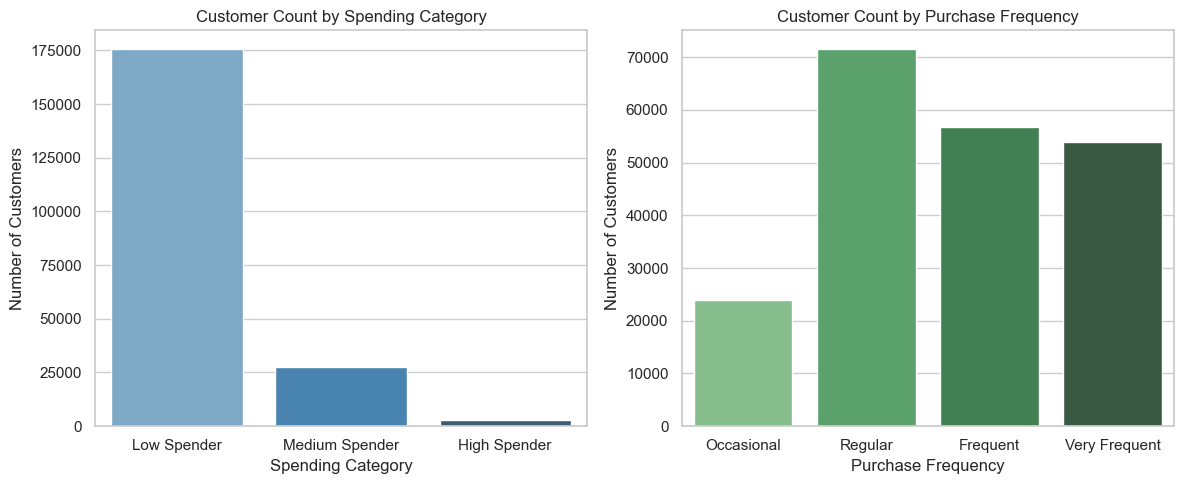

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for Spending Category
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
spending_counts = segments_df['spending_category'].value_counts().reindex(['Low Spender', 'Medium Spender', 'High Spender'])
sns.barplot(x=spending_counts.index, y=spending_counts.values, palette="Blues_d")
plt.title("Customer Count by Spending Category")
plt.ylabel("Number of Customers")
plt.xlabel("Spending Category")

# Count plot for Purchase Segment
plt.subplot(1, 2, 2)
frequency_counts = segments_df['purchase_segment'].value_counts().reindex(['Occasional', 'Regular', 'Frequent', 'Very Frequent'])
sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette="Greens_d")
plt.title("Customer Count by Purchase Frequency")
plt.ylabel("Number of Customers")
plt.xlabel("Purchase Frequency")

plt.tight_layout()
plt.show()




In [42]:
#Identifying inactive customers
# Group by user and get maximum days since prior order
inactive_df = orders.groupby('user_id')['days_since_prior_order'].max().reset_index()
inactive_df.rename(columns={'days_since_prior_order': 'max_days_since_prior'}, inplace=True)

# Filter customers with 30+ days or missing data
inactive_customers = inactive_df[
    (inactive_df['max_days_since_prior'] >= 30) | (inactive_df['max_days_since_prior'].isnull())
]

# Count of inactive customers
print("Number of inactive customers in the last 30 days:", inactive_customers['user_id'].nunique())
inactive_customers.head()

Number of inactive customers in the last 30 days: 152012


,user_id,max_days_since_prior
0,1,30.0
1,2,30.0
3,4,30.0
6,7,30.0
7,8,30.0


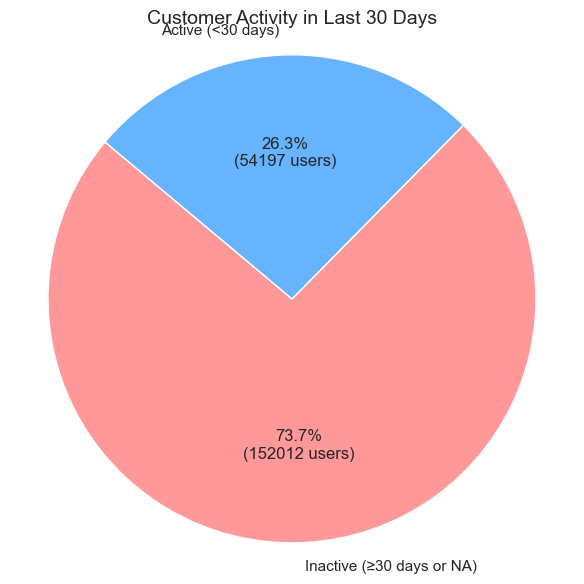

In [46]:
# Pie-Chart for inactive customers 

# Group by user and get maximum days since prior order)
inactive_df = orders.groupby('user_id')['days_since_prior_order'].max().reset_index()
inactive_df.rename(columns={'days_since_prior_order': 'max_days_since_prior'}, inplace=True)

# Filter customers with 30+ days or missing data
inactive_customers = inactive_df[
    (inactive_df['max_days_since_prior'] >= 30) | (inactive_df['max_days_since_prior'].isnull())
]

# Count
inactive_count = inactive_customers['user_id'].nunique()
active_count = inactive_df['user_id'].nunique() - inactive_count
counts = [inactive_count, active_count]
labels = ['Inactive (≥30 days or NA)', 'Active (<30 days)']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(counts))} users)', 
        startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Customer Activity in Last 30 Days', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [47]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier
from scipy.sparse import csr_matrix

In [49]:
# Feature Engineering
order_data = order_prior.merge(orders, on='order_id')
cart_avg = order_data.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().reset_index()
cart_avg.rename(columns={'add_to_cart_order': 'avg_cart_position'}, inplace=True)
order_data = order_data.merge(cart_avg, on=['user_id', 'product_id'], how='left')
order_data['avg_cart_position'] = order_data['avg_cart_position'].fillna(order_data['add_to_cart_order'])


In [50]:
# Final feature set
order_data = order_data[['user_id', 'product_id', 'order_dow', 'order_hour_of_day',
                         'days_since_prior_order', 'add_to_cart_order', 'avg_cart_position', 'reordered']]
X = order_data.drop(columns=['user_id', 'product_id', 'reordered']).fillna(0)
y = order_data['reordered'].fillna(0).astype(int)
user_product_ref = order_data[['user_id', 'product_id']]

In [51]:
# Train - Test Split
X_train, X_test, y_train, y_test, user_product_train, user_product_test = train_test_split(
    X, y, user_product_ref, test_size=0.2, random_state=42)


In [52]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# XGBoost Model 
model = XGBClassifier(n_estimators=450, max_depth=6, learning_rate=0.025,
                      subsample=0.9, colsample_bytree=0.9,
                      scale_pos_weight=5.5, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

/Users/aditireddydoma/Desktop/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:46:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
# Predictions
y_proba = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.98
X_test_copy = X_test.copy()
X_test_copy['reorder_prob'] = y_proba
X_test_copy['actual'] = y_test.values
X_test_copy['user_id'] = user_product_test['user_id'].values
X_test_copy['product_id'] = user_product_test['product_id'].values
X_test_copy['recommend'] = (X_test_copy['reorder_prob'] > threshold) & (X_test_copy['days_since_prior_order'] >= 5)


In [55]:
#  Reuse of Customer Segmentation from EDA 
X_test_copy = X_test_copy.merge(segments_df, on='user_id', how='left')

In [56]:
# Filtering Based on Segments
def personalize_recommendations(df):
    recs = []
    for _, row in df.iterrows():
        if row['spending_category'] == 'High Spender':
            recs.append(row['reorder_prob'] > 0.96)
        elif row['spending_category'] == 'Low Spender' and row['purchase_segment'] == 'Occasional':
            recs.append(row['reorder_prob'] > 0.99)
        else:
            recs.append(row['reorder_prob'] > 0.98)
    return recs

X_test_copy['recommend'] = personalize_recommendations(X_test_copy)


In [57]:
# Sparse Matrix for Nearest Neighbors
order_data['interaction'] = 1
user_index = {u: i for i, u in enumerate(order_data['user_id'].unique())}
product_index = {p: i for i, p in enumerate(order_data['product_id'].unique())}
row_idx = order_data['user_id'].map(user_index)
col_idx = order_data['product_id'].map(product_index)
sparse_user_product_matrix = csr_matrix((order_data['interaction'], (row_idx, col_idx)),
                                        shape=(len(user_index), len(product_index)))

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(sparse_user_product_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [62]:
# Hybrid Recommendations 
hybrid_recs = []
sample_users = X_test_copy['user_id'].drop_duplicates().sample(100, random_state=42)
X_test_sample = X_test_copy[X_test_copy['user_id'].isin(sample_users)]

for user_id in X_test_sample['user_id'].unique():
    if user_id not in user_index:
        continue
    user_row = user_index[user_id]
    distances, indices = knn.kneighbors(sparse_user_product_matrix[user_row], n_neighbors=4)
    similar_users = [list(user_index.keys())[i] for i in indices.flatten()[1:]]
    top_similar_products = order_data[order_data['user_id'].isin(similar_users)]['product_id'].value_counts().head(10).index
    user_suggestions = X_test_sample[(X_test_sample['user_id'] == user_id) &
                                     (X_test_sample['product_id'].isin(top_similar_products)) &
                                     (X_test_sample['recommend'])]
    if not user_suggestions.empty:
        message = ""
        seg = segments_df[segments_df['user_id'] == user_id]
        if not seg.empty:
            spender = seg['spending_category'].values[0]
            freq = seg['purchase_segment'].values[0]
            if spender == 'High Spender':
                message = "Exclusive Loyalty Offer: Get early access to premium deals!"
            elif freq == 'Occasional':
                message = "Promo Tip: Enjoy 10% off your next order as a valued returning customer."
        user_suggestions['promo_message'] = message
    hybrid_recs.append(user_suggestions)

hybrid_final = pd.concat(hybrid_recs).drop_duplicates(subset=['user_id', 'product_id'])
hybrid_final = hybrid_final.merge(products[['product_id', 'product_name']], on='product_id', how='left')


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/3904079118.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_suggestions['promo_message'] = message
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/3904079118.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_suggestions['promo_message'] = message
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_1118/3904079118.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [71]:
# Hybrid Recommendations
hybrid_recs = []
sample_users = X_test_copy['user_id'].drop_duplicates().sample(100, random_state=42)
X_test_sample = X_test_copy[X_test_copy['user_id'].isin(sample_users)]

for user_id in X_test_sample['user_id'].unique():
    if user_id not in user_index:
        continue
    user_row = user_index[user_id]
    distances, indices = knn.kneighbors(sparse_user_product_matrix[user_row], n_neighbors=4)
    similar_users = [list(user_index.keys())[i] for i in indices.flatten()[1:]]
    top_similar_products = order_data[order_data['user_id'].isin(similar_users)]['product_id'].value_counts().head(10).index
    user_suggestions = X_test_sample[(X_test_sample['user_id'] == user_id) &
                                     (X_test_sample['product_id'].isin(top_similar_products)) &
                                     (X_test_sample['recommend'])]
    hybrid_recs.append(user_suggestions)

hybrid_final = pd.concat(hybrid_recs).drop_duplicates(subset=['user_id', 'product_id'])
hybrid_final = hybrid_final.merge(products[['product_id', 'product_name']], on='product_id', how='left')


In [94]:
# Adding Promotion Message
def assign_promotions(row):
    if row['spending_category'] == 'High Spender' and row['purchase_segment'] in ['Very Frequent', 'Frequent']:
        return "✨  You're eligible for Premium Loyalty Perks — shop early and save more!"
    elif row['spending_category'] == 'Medium Spender' or row['purchase_segment'] == 'Regular':
        return "✨  Limited-Time Bundle Deal: Save more when you reorder your favorites!"
    elif row['purchase_segment'] == 'Occasional':
        return "✨ Hey there! Here’s a personalized offer just for you — don’t miss out!"
    else:
        return "✨  Keep going! Discover more with our smart picks tailored to your taste."

hybrid_final['promotion'] = hybrid_final.apply(assign_promotions, axis=1)

pd.set_option('display.max_colwidth', None)





In [75]:
# Inactive Users Suggestion 
inactive_info = order_data.groupby('user_id')['days_since_prior_order'].max().reset_index()
inactive_users = inactive_info[inactive_info['days_since_prior_order'] >= 30]['user_id']
current_hour = pd.Timestamp.now().hour
current_day = pd.Timestamp.now().dayofweek
order_prior_time = order_data.merge(products[['product_id', 'product_name']], on='product_id')
order_prior_time['time_slot'] = order_prior_time['order_hour_of_day'].apply(lambda h: 'Morning' if 6 <= h < 12 else 'Afternoon' if 12 <= h < 18 else 'Evening' if 18 <= h <= 23 else 'Night')
top_products_by_time = order_prior_time.groupby(['order_dow', 'time_slot', 'product_name']).size().reset_index(name='count')
top3_per_slot = top_products_by_time.sort_values(['order_dow', 'time_slot', 'count'], ascending=[True, True, False]) \
                                     .groupby(['order_dow', 'time_slot']).head(3)
inactive_suggestions = top3_per_slot[(top3_per_slot['order_dow'] == current_day) &
                                     (top3_per_slot['time_slot'] == ('Morning' if 6 <= current_hour < 12 else 'Afternoon' if 12 <= current_hour < 18 else 'Evening' if 18 <= current_hour <= 23 else 'Night'))]


In [92]:
# Evaluation and Recommendations
print("\nPrecision on Recommended Products:")
print(precision_score(hybrid_final['actual'], [1]*len(hybrid_final)) if not hybrid_final.empty else "No recommendations")

print("\nRecall on Recommended Products:")
print(recall_score(hybrid_final['actual'], [1]*len(hybrid_final)) if not hybrid_final.empty else "No recommendations")

y_pred = model.predict(X_test_scaled)
print("\nOverall Recall (on full test set):", recall_score(y_test, y_pred))

print("\nTop 10 Recommendations:")
print(hybrid_final[['user_id', 'product_id', 'product_name', 'promotion', 'reorder_prob']].sort_values(by='reorder_prob', ascending=False).head(10))

print("\nInactive User Suggestions based on current day and hour:")
for _, row in inactive_suggestions.iterrows():
    print(f"Would you like to reorder {row['product_name']}? It's a popular choice!")



Precision on Recommended Products:
0.9615384615384616

Recall on Recommended Products:
1.0

Overall Recall (on full test set): 0.9823902711776947

Top 10 Recommendations:
    user_id  product_id                             product_name  \
28    53004       24852                                   Banana   
48   170707       45504               Whole Organic Omega 3 Milk   
47    91821       11576                               Corn Chips   
37    67944       43352                              Raspberries   
22   112557       21903                     Organic Baby Spinach   
33    78705       17119  Super Chunk Extra Crunchy Peanut Butter   
21    73712        3873                    Mountain Spring Water   
8    205943       41488                           Chocolate Milk   
51   171260       25830                   Eggo Blueberry Waffles   
9     82085       24852                                   Banana   

                                                                    promotion  